In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import time
from timeit import default_timer as timer
import pickle

C:\Users\sivap\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sivap\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\sivap\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\sivap\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


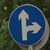

In [2]:
img = image.load_img("C:/Users/sivap/Desktop/archive (1)/traffic_sign_classification_dataset/train/COMPULSARY_AHEAD_OR_TURN_RIGHT/08023.jpg")
img

In [3]:
cv2.imread("C:/Users/sivap/Desktop/archive (1)/traffic_sign_classification_dataset/train/COMPULSARY_AHEAD_OR_TURN_RIGHT/08023.jpg")

array([[[21, 53, 42],
        [32, 64, 53],
        [40, 74, 64],
        ...,
        [34, 61, 57],
        [38, 65, 55],
        [35, 61, 48]],

       [[45, 77, 66],
        [35, 67, 56],
        [32, 63, 54],
        ...,
        [33, 58, 54],
        [44, 69, 59],
        [39, 65, 52]],

       [[48, 78, 67],
        [38, 70, 59],
        [33, 64, 55],
        ...,
        [27, 49, 44],
        [36, 60, 52],
        [33, 58, 48]],

       ...,

       [[32, 63, 54],
        [40, 70, 59],
        [34, 61, 51],
        ...,
        [12, 21, 18],
        [32, 45, 43],
        [31, 45, 43]],

       [[35, 57, 52],
        [36, 59, 51],
        [37, 60, 52],
        ...,
        [11, 25, 21],
        [14, 27, 25],
        [14, 27, 25]],

       [[39, 56, 52],
        [37, 54, 50],
        [35, 56, 48],
        ...,
        [12, 28, 21],
        [21, 34, 32],
        [21, 34, 32]]], dtype=uint8)

In [4]:
train = ImageDataGenerator(rescale=1/255)
Validation = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory('C:/Users/sivap/Desktop/archive (1)/traffic_sign_classification_dataset/train',target_size=(244,244),batch_size=10,class_mode='categorical')

Found 4438 images belonging to 85 classes.


In [6]:
validation_dataset = train.flow_from_directory('C:/Users/sivap/Desktop/archive (1)/traffic_sign_classification_dataset/test',target_size=(244,244),batch_size=10,class_mode='categorical')

Found 1288 images belonging to 85 classes.


In [7]:
mapper = train_dataset.class_indices

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(244,244,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(85,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset,steps_per_epoch=45,epochs=30,validation_data=validation_dataset)

Epoch 1/30
45/45 [==============================] - 37s 821ms/step - loss: 5.8320 - accuracy: 0.1400 - val_loss: 3.6668 - val_accuracy: 0.2399
Epoch 2/30
45/45 [==============================] - 39s 868ms/step - loss: 2.9423 - accuracy: 0.3289 - val_loss: 2.7521 - val_accuracy: 0.3952
Epoch 3/30
45/45 [==============================] - 38s 851ms/step - loss: 2.2708 - accuracy: 0.4489 - val_loss: 2.3104 - val_accuracy: 0.4030
Epoch 4/30
45/45 [==============================] - 36s 807ms/step - loss: 1.8840 - accuracy: 0.5044 - val_loss: 2.0037 - val_accuracy: 0.5171
Epoch 5/30
45/45 [==============================] - 36s 817ms/step - loss: 1.5872 - accuracy: 0.5911 - val_loss: 1.9457 - val_accuracy: 0.5155
Epoch 6/30
45/45 [==============================] - 36s 810ms/step - loss: 1.2850 - accuracy: 0.6578 - val_loss: 1.8140 - val_accuracy: 0.5365
Epoch 7/30
45/45 [==============================] - 35s 786ms/step - loss: 1.3213 - accuracy: 0.6356 - val_loss: 1.5953 - val_accuracy: 0.5970

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


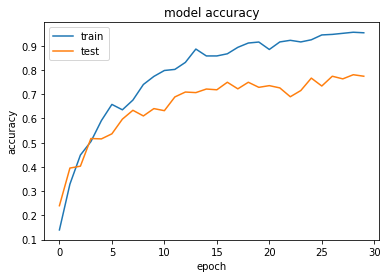

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

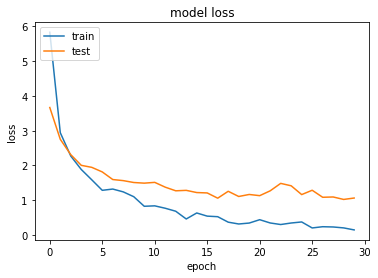

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PREDICTION

In [14]:
from tensorflow.keras.preprocessing import image

def make_prediction(img_path):
    img = image.load_img(img_path,color_mode='rgb', target_size=(244, 244))
    x = image.img_to_array(img)
    x.shape
    x = np.expand_dims(x, axis=0)
    return model.predict(x)

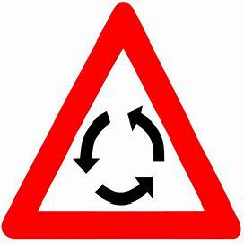

In [15]:
img_path = "C:/Users/sivap/Desktop/archive (1)/traffic_sign_classification_dataset/train/ROUNDABOUT/57015.jpg"
img = image.load_img(img_path,color_mode='rgb', target_size=(244, 244))
display(img)

In [16]:
features = make_prediction(img_path = "C:/Users/sivap/Desktop/archive (1)/traffic_sign_classification_dataset/train/ROUNDABOUT/57015.jpg")
p = np.argmax(features)

1/1 [==============================] - 0s 163ms/step


In [17]:
!pip install pyttsx3

In [18]:
label = list(mapper.keys())
values = list(mapper.values())

In [21]:
import pyttsx3
tb = pyttsx3.init()
for i in range(3):
    tb.say(label[p])
    tb.runAndWait()
    print(label[p])

ROUNDABOUT
ROUNDABOUT
ROUNDABOUT
